In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

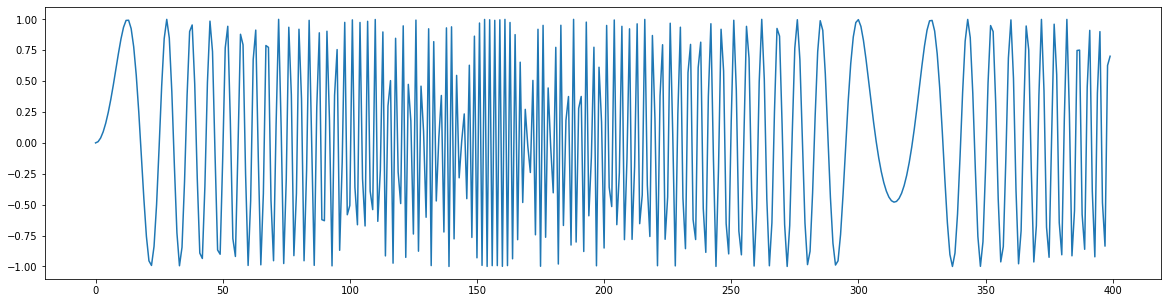

In [ ]:
series = np.sin((0.1 * np.arange(400)) ** 2)

plt.figure(figsize=(20, 5))
plt.plot(series)
plt.show()

In [ ]:
series[0:10]

array([0.        , 0.00999983, 0.03998933, 0.08987855, 0.15931821,
       0.24740396, 0.35227423, 0.47062589, 0.59719544, 0.72428717])

In [ ]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print("X.shape:", X.shape)
print("Y.shape:", Y.shape)

X.shape: (390, 10)
Y.shape: (390,)


In [ ]:
# Autoregressive Linear Model
i = Input(shape=(T, ))
x = Dense(units=1)(i)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.mean_squared_error)
r = model.fit(x=X[:-N//2], y=Y[:-N//2], 
          validation_data=(X[-N//2:], Y[-N//2:]), 
          epochs=80)

Epoch 1/80
7/7 [==============================] - 0s 19ms/step - loss: 2.0906 - val_loss: 0.6681
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 2.2705 - val_loss: 0.6628
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 1.8025 - val_loss: 0.6579
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 1.9673 - val_loss: 0.6531
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 2.2484 - val_loss: 0.6483
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 1.9326 - val_loss: 0.6443
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 2.2318 - val_loss: 0.6406
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 2.0690 - val_loss: 0.6372
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 1.8966 - val_loss: 0.6338
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 1.9248 - val_loss: 0.6304
Epoch 11/80
7/7 [=====================

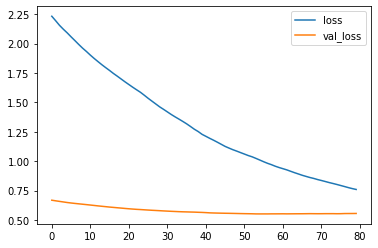

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

outputs.shape: (390, 1)


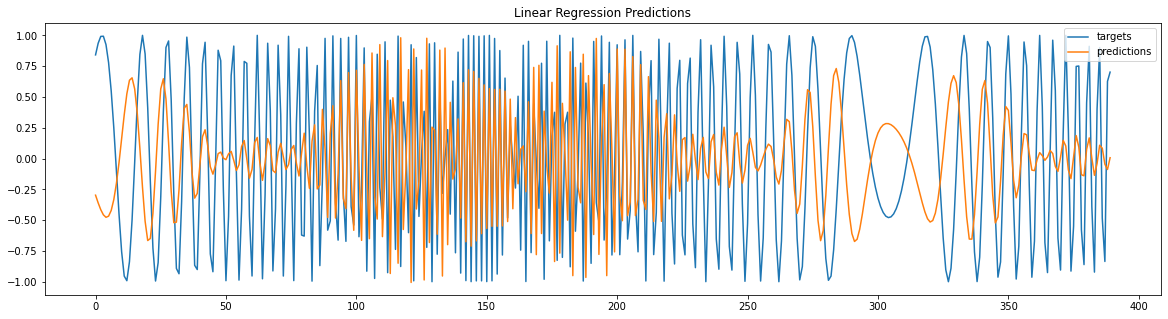

In [ ]:
outputs = model.predict(X)
print("outputs.shape:", outputs.shape)

predictions = outputs[:, 0]

plt.figure(figsize=(20, 5))
plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

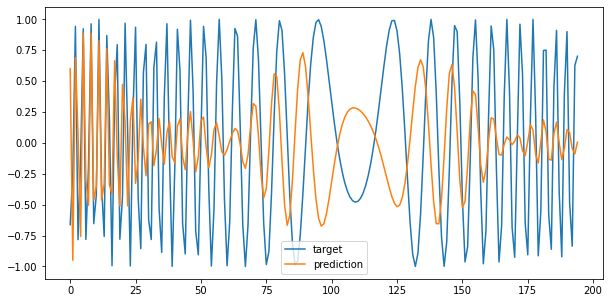

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1

    validation_predictions.append(p)

plt.figure(figsize=(10, 5))
plt.plot(validation_target, label="target")
plt.plot(validation_predictions, label="prediction")
plt.legend()
plt.show()

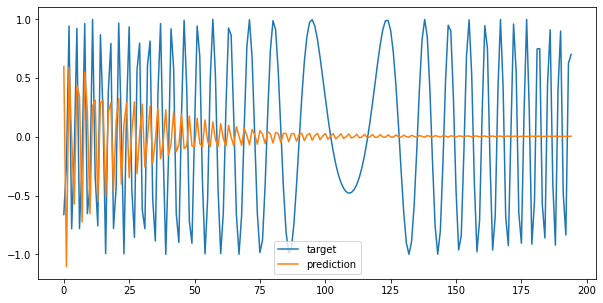

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    validation_predictions.append(p)

    last_x = np.roll(last_x, -1)    
    last_x[-1] = p

plt.figure(figsize=(10, 5))
plt.plot(validation_target, label="target")
plt.plot(validation_predictions, label="prediction")
plt.legend()
plt.show()

In [ ]:
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
x = SimpleRNN(units=10)(i)
x = Dense(units=1)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.05), 
              loss=tf.keras.losses.mean_squared_error)
r = model.fit(x=X[:-N//2], y=Y[:-N//2], 
              validation_data=(X[-N//2:], Y[-N//2:]), 
              epochs=200, 
              batch_size=32)

Epoch 1/200
7/7 [==============================] - 1s 70ms/step - loss: 0.7279 - val_loss: 0.7157
Epoch 2/200
7/7 [==============================] - 0s 19ms/step - loss: 0.5244 - val_loss: 0.5516
Epoch 3/200
7/7 [==============================] - 0s 19ms/step - loss: 0.4238 - val_loss: 0.4072
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.3958 - val_loss: 0.3663
Epoch 5/200
7/7 [==============================] - 0s 18ms/step - loss: 0.3408 - val_loss: 0.3726
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 0.2920 - val_loss: 0.2286
Epoch 7/200
7/7 [==============================] - 0s 20ms/step - loss: 0.1995 - val_loss: 0.2188
Epoch 8/200
7/7 [==============================] - 0s 19ms/step - loss: 0.1851 - val_loss: 0.1605
Epoch 9/200
7/7 [==============================] - 0s 20ms/step - loss: 0.1187 - val_loss: 0.1475
Epoch 10/200
7/7 [==============================] - 0s 19ms/step - loss: 0.1201 - val_loss: 0.1209
Epoch 11/200
7/7 [=

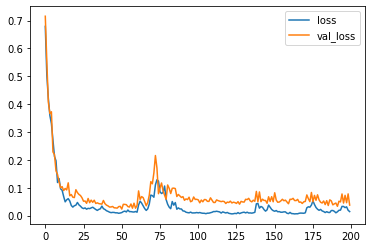

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

outputs.shape: (390, 1)


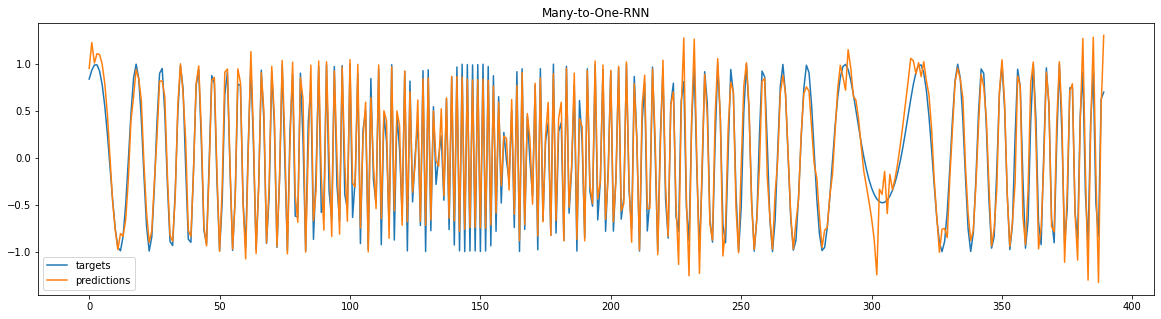

In [ ]:
outputs = model.predict(X)
print("outputs.shape:", outputs.shape)

predictions = outputs[:, 0]

plt.figure(figsize=(20, 5))
plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Many-to-One-RNN")
plt.legend()
plt.show()

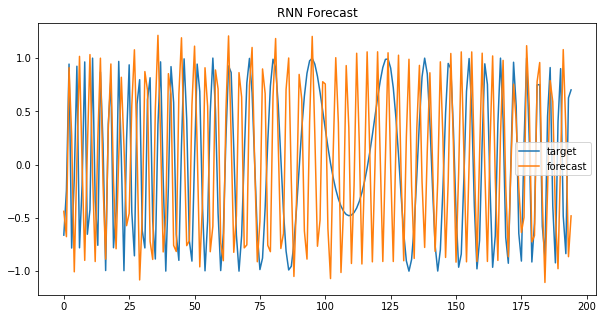

In [ ]:
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    p = model.predict(input_.reshape(1, T, 1))[0, 0] 
    forecast.append(p)

    input_ = np.roll(input_, -1)
    input_[-1] = p

plt.figure(figsize=(10, 5))
plt.plot(Y[-N//2:], label="target")
plt.plot(forecast, label="forecast")
plt.title("RNN Forecast")
plt.legend()
plt.show()

In [ ]:
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
x = LSTM(units=10)(i)
x = Dense(units=1)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.05), 
              loss=tf.keras.losses.mean_squared_error)
r = model.fit(x=X[:-N//2], y=Y[:-N//2], 
              validation_data=(X[-N//2:], Y[-N//2:]), 
              epochs=200, 
              batch_size=32)

Epoch 1/200
7/7 [==============================] - 2s 60ms/step - loss: 0.5608 - val_loss: 0.5247
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5150 - val_loss: 0.5336
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4639 - val_loss: 0.5976
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4883 - val_loss: 0.5362
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4648 - val_loss: 0.5280
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3951 - val_loss: 0.4561
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3173 - val_loss: 0.4095
Epoch 8/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2537 - val_loss: 0.2808
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1657 - val_loss: 0.2582
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1160 - val_loss: 0.1859
Epoch 11/200
7/7 [=======

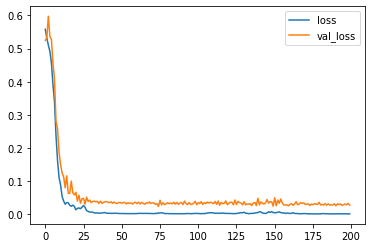

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

outputs.shape: (390, 1)


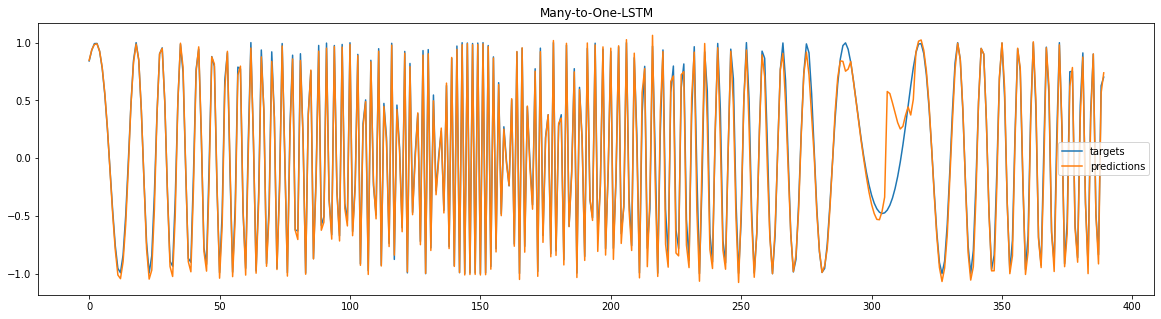

In [ ]:
outputs = model.predict(X)
print("outputs.shape:", outputs.shape)

predictions = outputs[:, 0]

plt.figure(figsize=(20, 5))
plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Many-to-One-LSTM")
plt.legend()
plt.show()

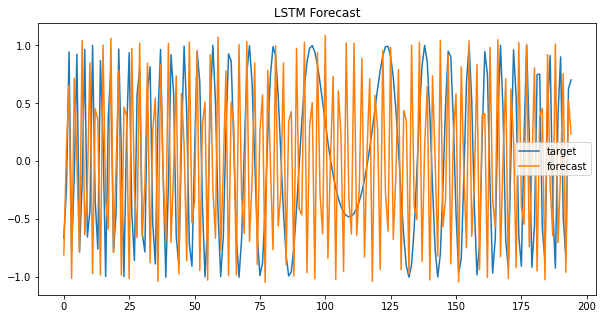

In [ ]:
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    p = model.predict(input_.reshape(1, T, 1))[0, 0] 
    forecast.append(p)

    input_ = np.roll(input_, -1)
    input_[-1] = p

plt.figure(figsize=(10, 5))
plt.plot(Y[-N//2:], label="target")
plt.plot(forecast, label="forecast")
plt.title("LSTM Forecast")
plt.legend()
plt.show()